In [3]:
import pandas as pd

df = pd.read_csv('international-airline-passengers.csv')
df = df.dropna()
df = df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'total', 'Month': 'month'})

In [4]:
# データの変換
df.month = pd.to_datetime(df.month)
df = df.set_index('month')

In [5]:
# SARIMAモデル作成
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    df.total[:-25],
    order=(2, 1, 11),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False)
result = model.fit()

/Users/k.takeuchi/Documents/whitepaper/iap-analytics/.venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [7]:
train_pred = result.predict()
test_pred = result.forecast(len(df.total[-25:]))

In [14]:
test_pred_ci = result.get_forecast(len(df.total[-25:])).conf_int()

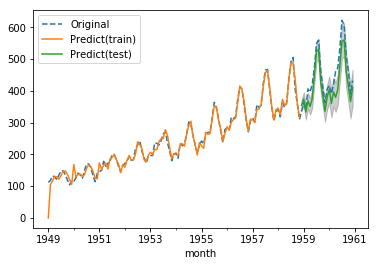

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.total.plot(ax=ax, label='Original', linestyle="dashed")
train_pred.plot(ax=ax, label='Predict(train)')
test_pred.plot(ax=ax, label='Predict(test)')
ax.fill_between(
    test_pred_ci.index,
    test_pred_ci.iloc[:, 0],
    test_pred_ci.iloc[:, 1],
    color='k',
    alpha=.2)
ax.legend()

In [18]:
# 精度
(df.total[-25:]-test_pred).abs().mean()

35.23702332486416